In [91]:
# imports and specifications
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.externals import joblib

#To validate/cross validate--create training and test data
from sklearn.cross_validation import train_test_split

In [92]:
class BinaryClassificationPerformance():
    '''Performance measures to evaluate the fit of a binary classification model'''
    
    def __init__(self, predictions, labels, desc, probabilities=None):
        '''Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y'''
        '''probabilities-optional, probability that Y is equal to True'''
        self.probabilities = probabilities
        self.performance_df = pd.concat([pd.DataFrame(predictions), pd.DataFrame(labels)], axis=1)
        self.performance_df.columns = ['preds', 'labls']
        self.desc = desc
        self.performance_measures = {}
  
    def compute_measures(self):
        '''Compute performance measures defined by Flach p. 57'''
        self.performance_measures['Pos'] = self.performance_df['preds'].sum()
        self.performance_measures['Neg'] = self.performance_df.shape[0] - self.performance_df['preds'].sum()
        self.performance_measures['TP'] = ((self.performance_df['preds'] == True) & (self.performance_df['labls'] == True)).sum()
        self.performance_measures['TN'] = ((self.performance_df['preds'] == False) & (self.performance_df['labls'] == False)).sum()
        self.performance_measures['FP'] = ((self.performance_df['preds'] == True) & (self.performance_df['labls'] == False)).sum()
        self.performance_measures['FN'] = ((self.performance_df['preds'] == False) & (self.performance_df['labls'] == True)).sum()
        self.performance_measures['Accuracy'] = (self.performance_measures['TP'] + self.performance_measures['TN']) / (self.performance_measures['Pos'] + self.performance_measures['Neg'])

In [94]:
amazon = pd.read_csv('raw_data_test.csv')
print(amazon.shape)

(91000, 14)


In [82]:
amazon['helpful'].sum()

6615

In [96]:
###Prof Hill
amazon = amazon[amazon['HelpfulnessDenominator'] > 0]

In [97]:
amazon['HelpfulnessDenominator'].describe()

count    47751.000000
mean         4.187452
std         10.169420
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        544.000000
Name: HelpfulnessDenominator, dtype: float64

In [98]:
amazon['new_helpful'] = (amazon.HelpfulnessDenominator > 3) & (amazon.helpScore >= 1)

In [71]:
#amazon = amazon[amazon['helpScore'] >= 1]
#amazon = amazon[amazon['HelpfulnessNumerator'] > 3]

In [99]:
amazon['new_helpful'].sum()

5652

In [74]:
hv = joblib.load('hv.pkl') # pickle
X_hv = hv.transform(amazon.Text)
print(X_hv.shape)

(5652, 131072)


In [75]:
transformer = joblib.load('transformer.pkl')
X_tfidf = transformer.transform(X_hv)
print(type(X_tfidf))

<class 'scipy.sparse.csr.csr_matrix'>


In [78]:
# features from Amazon.csv to add to feature set

##FEATURE 1 - REVIEW LENGTH
#create a new column called review length which shows the length of each review
amazon['reviewLen'] = amazon['Text'].str.len()

##FEATURE 2 - PROFILE NAME
#Use profile name
prof_name = amazon['ProfileName']

#THIS IS THE ACTUAL CODE - Create dataframe with names and frequences attached
df_name = pd.DataFrame({'names' : list(prof_name)})
df_name['freq'] = df_name.groupby('names')['names'].transform('count')
df_name
amazon['profile_freq'] = df_name['freq'] 

#FEATURE 3 - PROFILE LENGTH
amazon['profileLen'] = amazon['ProfileName'].str.len()

#delete NaN's
where_are_NaNs_1 = np.isnan(amazon['profileLen'])
amazon[where_are_NaNs_1] = 0

#FEATURE 4 - SCORE
#print(type(amazon['Score']))

#FEATURE 5 - SUMMARY LENGTH
amazon['summaryLen'] = amazon['Summary'].str.len()
#delete NaN's
where_are_NaNs_2 = np.isnan(amazon['summaryLen'])
amazon[where_are_NaNs_2] = 0

#FEATURES 6,7,8,9,10,11,12
#6 - Score - Profile frequency interaction
amazon['score_count'] = amazon['Score']*amazon['profile_freq']
#delete NaN's
where_are_NaNs_3 = np.isnan(amazon['score_count'])
amazon['score_count'][where_are_NaNs_3] = 0

# #7 - Review length - Profile frequency interaction
# amazon['revLen_count'] = amazon['reviewLen']*df_name['freq']
# #delete NaN's
# where_are_NaNs_4 = np.isnan(amazon['revLen_count'])
# amazon[where_are_NaNs_4] = 0

# #8 - Score - Review length interaction
# amazon['score_revLen'] = amazon['Score']*amazon['reviewLen']

# #9 - Score - Summary length interaction
# amazon['score_sumLen'] = amazon['Score']*amazon['summaryLen']

# #10 - Summary length - Profile frequency interaction
# amazon['sumLen_count'] = amazon['summaryLen']*df_name['freq']
# #delete NaN's
# where_are_NaNs_5 = np.isnan(amazon['sumLen_count'])
# amazon[where_are_NaNs_5] = 0

# #11 - Time
# #amazon['Time']

# #12 - Exclamation points
# df1 = pd.DataFrame(amazon['Summary'])
# df1.columns = ['summary']
# df1['count'] = df1.summary.str.count('!')


# amazon['exclam'] = df1['count']
# #delete NaN's
# where_are_NaNs_6 = np.isnan(amazon['exclam'])
# amazon[where_are_NaNs_6] = 0

In [31]:
# ##This is a function that counts the number of uppercase letters in a string
# def cap_count(s):
#     d = 0
#     for c in s:
#         if c.isupper():
#            d+=1  
#         else:
#            pass
#     #z = d["uppercase"]
#     return d
            
# #Here we create a new column that is the number of uppercase in all the summaries
# df2 = pd.DataFrame(amazon['Summary'])
# df2['new'] = df2['Summary'][(df2.Summary != 0)].apply(lambda s : cap_count(s))
# #df2['new'] = df2['Summary'][(df2.Summary != 0)].apply(cap_count)
# amazon['capscount'] = df2['new']
# #delete NaN's
# where_are_NaNs_7 = np.isnan(amazon['capscount'])
# amazon[where_are_NaNs_7] = 0

In [79]:
amazon['helpful'].sum()

310

In [10]:
##Create a Features Matrix (with only the created features)

X_features = amazon[["reviewLen", 
                     "profile_freq",
                     "profileLen",
                     "Score",
                     "summaryLen",
                     "score_count",
                     "revLen_count",
                     "score_revLen",
                     "score_sumLen",
                     "sumLen_count",
                     "Time",
                     "exclam",
                     "Id",
                     "capscount"]]
print(type(X_features))

<class 'pandas.core.frame.DataFrame'>


In [11]:
#Convert additional features to csr matrix and "stack" with tfidf matrix
from scipy.sparse import csr_matrix, hstack
X_features_csr = csr_matrix(X_features)
X_combined = hstack([X_tfidf, X_features_csr])
X_matrix = csr_matrix(X_combined) # convert to sparse matrix
print(X_matrix.shape)

(5652, 131086)


In [12]:
sc = joblib.load('sc.pkl')
X = sc.transform(X_matrix)
print(X.shape)

(5652, 131086)


In [18]:
y = amazon['helpful'].values
print(type(y))
y.sum()

<class 'numpy.ndarray'>


310

In [13]:
# # MODEL: SVM, linear
#Loading pickle
svm = joblib.load('svm.pkl') # pickle
svm_performance = BinaryClassificationPerformance(svm.predict(X), y, 'svm')
svm_performance.compute_measures()
print(svm_performance.performance_measures)

{'Pos': 323, 'FN': 17, 'FP': 30, 'TN': 5312, 'Accuracy': 0.99168435951875444, 'Neg': 5329, 'TP': 293}


In [14]:
# MODEL: logistic regression
#Loading pickle
lgs = joblib.load('lgs.pkl')
lgs_performance = BinaryClassificationPerformance(lgs.predict(X), y, 'lgs')
lgs_performance.compute_measures()
print(lgs_performance.performance_measures)

{'Pos': 327, 'FN': 3, 'FP': 20, 'TN': 5322, 'Accuracy': 0.99593064401981601, 'Neg': 5325, 'TP': 307}


In [15]:
# MODEL: Naive Bayes
#Loading pickle
nbs = joblib.load('nbs.pkl')
nbs_performance = BinaryClassificationPerformance(nbs.predict(X), y, 'nbs')
nbs_performancee.compute_measures()
print(nbs_performance.performance_measures)

{'Pos': 648, 'FN': 145, 'FP': 483, 'TN': 4859, 'Accuracy': 0.88888888888888884, 'Neg': 5004, 'TP': 165}


In [16]:
# MODEL: Ridge Regression Classifier
#Loading pickle
rdg = joblib.load('rdg.pkl')
rdg_performance = BinaryClassificationPerformance(rdg.predict(X), y, 'rdg')
rdg_performance.compute_measures()
print(rdg_performance.performance_measures)

{'Pos': 312, 'FN': 1, 'FP': 3, 'TN': 5339, 'Accuracy': 0.99929228591648978, 'Neg': 5340, 'TP': 309}


In [17]:
# MODEL: Perceptron
#Loading pickle
prc = joblib.load('prc.pkl')

prc_performance = BinaryClassificationPerformance(prc.predict(X), y, 'prc')
prc_performance.compute_measures()
print(prc_performance.performance_measures)

{'Pos': 334, 'FN': 10, 'FP': 34, 'TN': 5308, 'Accuracy': 0.99221514508138708, 'Neg': 5318, 'TP': 300}


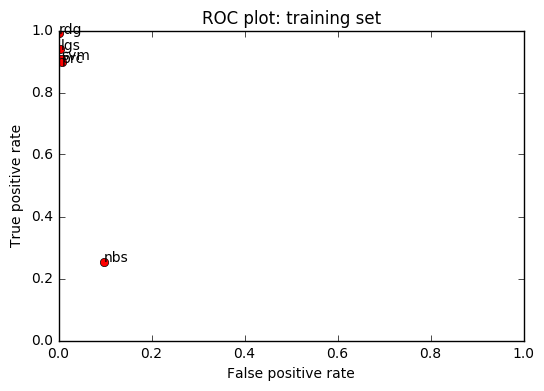

In [18]:
fits = [svm_performance, lgs_performance, nbs_performance, rdg_performance, prc_performance]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'ro')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: training set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()